In [1]:
import sys
import os
from pathlib import Path

PROJ_NAME = "optimal-stopping"

# Locate the Project directory
curr_dir = str(Path.cwd())
start = curr_dir.find(PROJ_NAME)
if start < 0:
    print("ERROR: Project directory not found")
    print("Make sure you have the correct project structure")
    print("and run the simulation from within the project")
proj_pathname = curr_dir[:(start+len(PROJ_NAME))]

# Create path to the project directory
proj_path = Path(proj_pathname)

# Add the project folder to PATH
sys.path.append(proj_pathname)

In [3]:
import os
from pathlib import Path
import numpy as np
from scipy import stats
from bin.result_processing import loadFile
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

plt.rc('font', size = 18)
results_path = Path(proj_path/"results/raw_data")
files = os.listdir(results_path)



===For Dataset 2 using Linear Regression===
Sensor name pi5 WAITING
1931
41
One-way ANOVA
F value: 727.7958367964313
P value: 0.0 <= 0.05
=> Reject H0



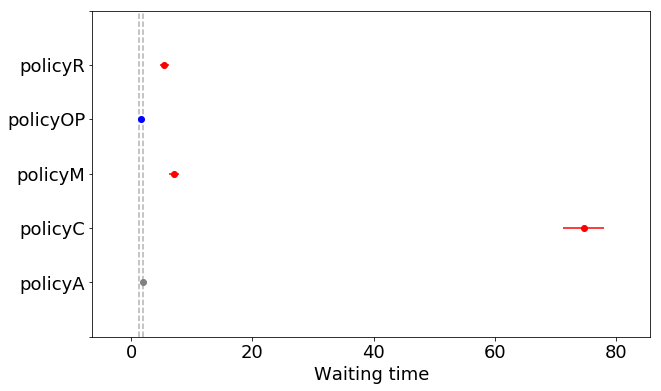

Sensor name pi4 WAITING
134
11
One-way ANOVA
F value: 113.98634942441677
P value: 4.185231282435871e-60 <= 0.05
=> Reject H0



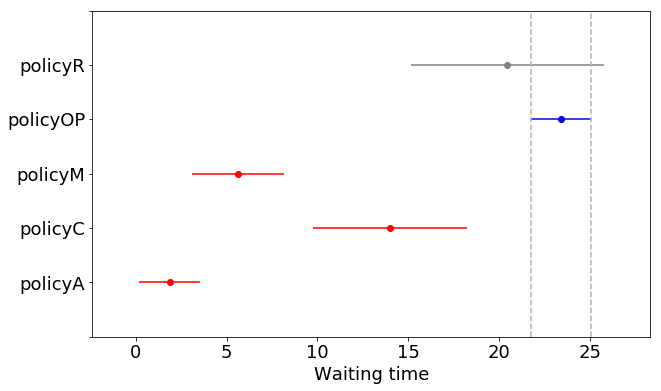

Sensor name pi2 WAITING
87
7
One-way ANOVA
F value: 165.96285864053408
P value: 1.875939683982221e-81 <= 0.05
=> Reject H0



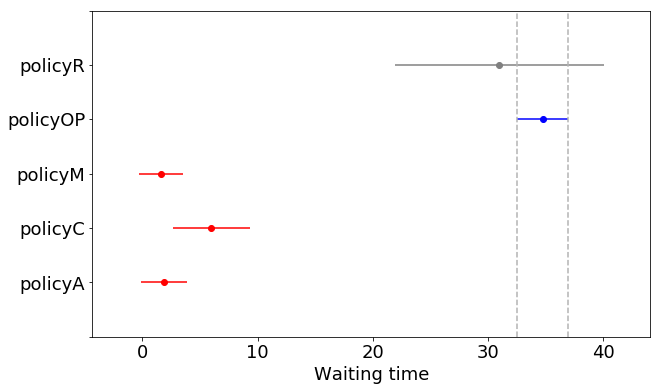

Sensor name pi3 WAITING
80
6
One-way ANOVA
F value: 137.08031657292798
P value: 7.475300238176721e-66 <= 0.05
=> Reject H0



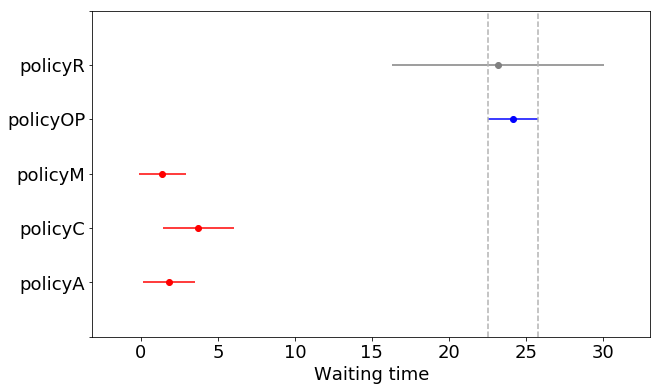

In [4]:
d2_data = {}

for filename in files:
    if filename[:12]=='waiting_time':
        with open(results_path/filename,"rb") as f:
            dataset, result = loadFile(f)
            if result.policyName == 'policyOST':
                if dataset == 2:
                    if result.sensor_name not in d2_data:
                        d2_data[result.sensor_name] = []
                    data = [("policyOP", wt) for wt in result.waiting_time]
                    d2_data[result.sensor_name] += data
            elif result.policyName != 'policyE' and result.policyName != 'policyN':
                if dataset == 2:
                    if result.sensor_name not in d2_data:
                        d2_data[result.sensor_name] = []
                    data = [(result.policyName, wt) for wt in result.waiting_time]
                    d2_data[result.sensor_name] += data

print("\n\n===For Dataset 2 using Linear Regression===")
for sensor_name in d2_data:
    print("Sensor name", sensor_name, "WAITING")
    data = np.rec.array(d2_data[sensor_name], dtype = [('Policy','|U10'),('Waiting', '<i8')])
    print(len(data[data['Policy'] == 'policyOP'].Waiting))
    print(len(data[data['Policy'] == 'policyR'].Waiting))
    f, p = stats.f_oneway(data[data['Policy'] == 'policyA'].Waiting,
                          data[data['Policy'] == 'policyC'].Waiting,
                          data[data['Policy'] == 'policyM'].Waiting,
                          data[data['Policy'] == 'policyR'].Waiting,
                          data[data['Policy'] == 'policyOP'].Waiting)
     
    print ('One-way ANOVA')
     
    print ('F value:', f)
    if p <= 0.05:
        print ('P value: {} <= 0.05'.format(p))
        print("=> Reject H0\n")
    else:
        print ('P value: {} > 0.05'.format(p))
        print("=> Fail to reject H0\n")

    '''
    Perform Tukey T-Test
    '''

    mc = MultiComparison(data['Waiting'], data['Policy'])
    result = mc.tukeyhsd(alpha=0.05)
#     with open('results/lin_reg_'+sensor_name+'_waiting_plot_diff_means.txt', 'w') as f:
#         f.write(str(result.summary()))
     
    fig, ax = plt.subplots()
    result.plot_simultaneous(comparison_name='policyOP', ax=ax)
    plt.xlabel('Waiting time')
    plt.title('')
    plt.rc('font', size = 18)
    plt.show()
#     plt.savefig('results/lin_reg_'+sensor_name+'_waiting_plot_diff_means'+'.png')
print("\n\n===========================================")




===For Dataset 2 using Linear Regression===
pi4 ERROR
One-way ANOVA
F value: 36.34857161673215
P value: 5.444477118369385e-35 <= 0.05
=> Reject H0



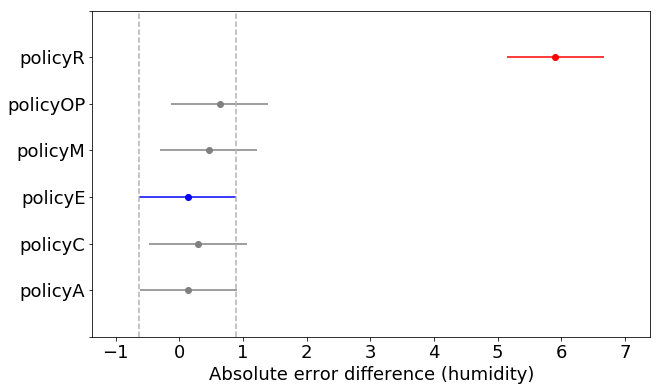

pi2 ERROR
One-way ANOVA
F value: 70.44873958299588
P value: 2.9621977377738563e-65 <= 0.05
=> Reject H0



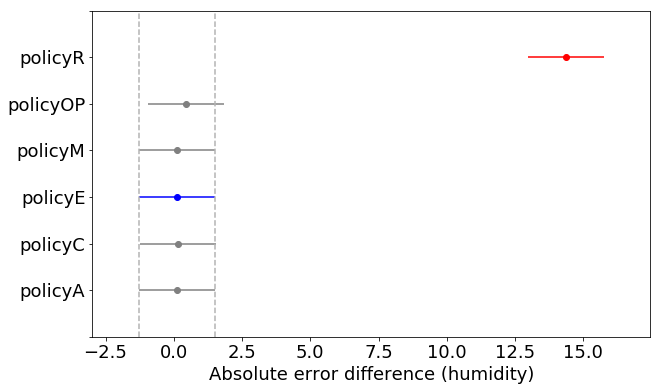

pi5 ERROR
One-way ANOVA
F value: 32.574776256221305
P value: 2.009744573235421e-31 <= 0.05
=> Reject H0



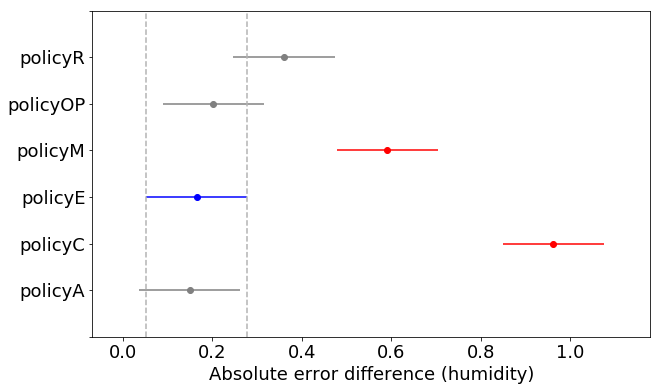

pi3 ERROR
One-way ANOVA
F value: 24.284687462087966
P value: 7.654357695780124e-23 <= 0.05
=> Reject H0



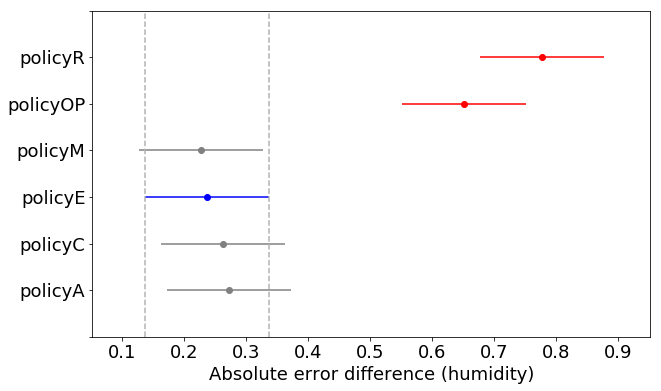

In [5]:
d2_data = {}

for filename in files:
	if filename[:7]=='results':
		with open(results_path/filename,"rb") as f:
			dataset, result = loadFile(f)
			if result.policyName == 'policyOST':
				if dataset == 2:
					if result.sensor_name not in d2_data:
						d2_data[result.sensor_name] = []
					data = [('policyOP', err) for err in result.err_diff]
					d2_data[result.sensor_name] += data
			elif result.policyName != 'policyN':
				if dataset == 2:
					if result.sensor_name not in d2_data:
						d2_data[result.sensor_name] = []
					data = [(result.policyName, err) for err in result.err_diff]
					d2_data[result.sensor_name] += data

print("\n\n===For Dataset 2 using Linear Regression===")
for sensor_name in d2_data:
	print(sensor_name, "ERROR")
	data = np.rec.array(d2_data[sensor_name], dtype = [('Policy','|U10'),('ErrorDiff', '<f8')])
	f, p = stats.f_oneway(data[data['Policy'] == 'policyC'].ErrorDiff,
	                      data[data['Policy'] == 'policyOP'].ErrorDiff,
	                      data[data['Policy'] == 'policyA'].ErrorDiff,
	                      data[data['Policy'] == 'policyR'].ErrorDiff,
	                      data[data['Policy'] == 'policyM'].ErrorDiff,
	                      data[data['Policy'] == 'policyE'].ErrorDiff)
	 
	print ('One-way ANOVA')
	 
	print ('F value:', f)
	if p <= 0.05:
		print ('P value: {} <= 0.05'.format(p))
		print("=> Reject H0\n")
	else:
		print ('P value: {} > 0.05'.format(p))
		print("=> Fail to reject H0\n")

	'''
	Perform Tukey T-Test
	'''

	mc = MultiComparison(data['ErrorDiff'], data['Policy'])
	result = mc.tukeyhsd(alpha=0.05)
# 	with open('results/lin_reg_'+sensor_name+'_error_plot_diff_means.txt', 'w') as f:
# 		f.write(str(result.summary()))
	 
	result.plot_simultaneous(comparison_name='policyE')
	plt.xlabel('Absolute error difference (humidity)')
	plt.title('')
	plt.rc('font', size = 18)
	plt.show()
# 	plt.savefig('results/lin_reg_'+sensor_name+'_error_plot_diff_means'+'.png')
print("\n\n===========================================")